# Flat Geodesic Integration with Different Coordinates

First, we import the necessary modules.

In [1]:
%load_ext autoreload
%autoreload 2

from jax.config import config
config.update("jax_enable_x64", True)

from jax import numpy as np

from fadge.metric.Euclidean import Cartesian
from fadge.geode            import Geode

from matplotlib import pyplot as plt

Define the 2-dimensional Cartesian metric and initial position and velocity.
Check the metric at the initial position.

In [2]:
gC = Cartesian(ndim=2)

x0C = np.array([ 1,1])
v0C = np.array([-1,1])

gC(x0C)

DeviceArray([[1., 0.],
             [0., 1.]], dtype=float64)

Define the metric for the 2-dimensional polar coordinate and initial position and velocity.
Check the metric at the initial position.

In [3]:
def gp(x):
    r  = x[0]
    th = x[1]
    return np.array([[1,0], [0,r*r]])

x0p = np.array([np.sqrt(2), np.pi/4])
v0p = np.array([0, 1])

gp(x0p)

DeviceArray([[1., 0.],
             [0., 2.]], dtype=float64)

Define an array of "affine" parameter.
Sample the geodesics in both coordiantes along with  affine parameters.

In [4]:
l = np.linspace(0,10)

geodeC = Geode(gC, 0, np.array([x0C, v0C]), eqax=[0,1], atol=1e-9, rtol=0)
ns = geodeC(l)
xC = ns[:,0,:]
vC = ns[:,1,:]

geodep = Geode(gp, 0, np.array([x0p, v0p]), eqax=[0,1], atol=1e-9, rtol=0)
ns = geodep(l)
xp = ns[:,0,:]
vp = ns[:,1,:]

jit(do); input: Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[2,2])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> [Traced<ShapedArray(float64[2,2])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,2])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,2])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,2])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,2])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,2])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,2])>with<DynamicJaxprTrace(level=0/1)>]
jit(do); input: Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float64[2,2])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> [Traced<ShapedArray(float64[2,2])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray

The geodesics in Cartesian coordinates is trivial.
However, the geodesics in polar coordinates has an interesting form.

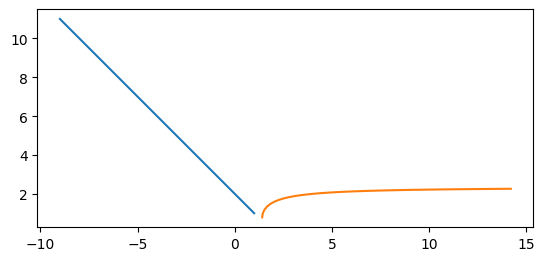

In [5]:
plt.plot(xC[:,0], xC[:,1])
plt.plot(xp[:,0], xp[:,1])
plt.gca().set_aspect('equal')

If we apply the proper coordinate transform for the polar coordiantes, then it is clear that the two solutions are identical.

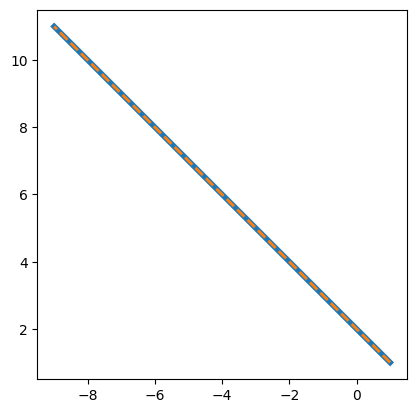

In [6]:
plt.plot(xC[:,0], xC[:,1], linewidth=4)

plt.plot(xp[:,0] * np.cos(xp[:,1]),
         xp[:,0] * np.sin(xp[:,1]), '--', linewidth=2)

plt.gca().set_aspect('equal')

Print the absolute errors between the two coordinate systems.

In [7]:
xerr = max(abs(xC[:,0] - xp[:,0] * np.cos(xp[:,1])))
yerr = max(abs(xC[:,1] - xp[:,0] * np.sin(xp[:,1])))

print(xerr, yerr)

7.269483036864699e-06 4.082119460235845e-06
